In [2]:
# Initialize Otter

import otter
grader = otter.Notebook("cs178_sp25_hw1.ipynb")

<div align="center">
<h1> CS178: Machine Learning & Data Mining </h1>
<h2> Homework 1: Due Friday 11 April 2025 (11:59 PM) </h2>
<h3> Version 1.0 (Last Modified: 2 April 2025) </h3>
</div>

---
## Instructions

Welcome to CS 178!

This homework (and many subsequent ones) will involve data analysis and reporting on methods and results
using Python code. You will submit a **.ipynb** file, or jupyter notebook, that contains everything to Gradescope. This includes any text you wish to include to describe your results, the complete code snippets of how you attempted each problem, and any figures that were generated. It is important that you include enough detail that we know how you solved the problem, since otherwise we will be unable to grade it.


Your homeworks will be given to you as Jupyter notebooks containing the problem descriptions and some template code that will help you get started. You should not modify the function signatures, only the code inside the function definitions. You may add additional cells (containing either code, helper functions, or text) as needed. This will help ensure that all of the code for the solutions is included. Do not delete any cells pertaining to the Autograder to ensure that you can receive credit for your work.

Several problems in this assignment require you to create plots. Use `matplotlib.pyplot` to do this, which is already imported for you as `plt`. Do not use any other plotting libraries, such as `seaborn`. Unless you are told otherwise, you should call `pyplot` plotting functions with their default arguments.

If you have any questions/concerns about using Jupyter notebooks, ask us on EdDiscussion.

### Summary of Assignment: 100 total points
- [Problem 1: Exploring the Abalone Dataset (31 points)](#problem-1-exploring-the-abalone-dataset)
  - [Problem 1.1: Numpy Arrays (3 points)](#problem-11-3-points-numpy-arrays)
    - [1.1.a: Abalone Shape (1 point)](#problem-11a-abalone-shape-1-point)
    - [1.1.b: Abalone Features (1 point)](#problem-11b-abalone-features-1-point)
    - [1.1.c: Abalone Slicing (1 point)](#problem-11c-abalone-slicing-1-point)
  - [Problem 1.2: Feature Statistics (4 points)](#problem-12-4-points-feature-statistics)
  - [Problem 1.3: Introduction to Pandas (10 points)](#problem-13-9-points-introduction-to-pandas)
    - [1.3.a: Abalone Shape (Pandas) (1 point)](#problem-13a-abalone-features-pandas)
    - [1.3.b: Abalone Features & Datatypes (Pandas) (1 point)](#problem-13b-abalone-features--datatypes-pandas)
    - [1.3.c: Abalone DataFrame Slicing Slicing (Pandas) (1 point)](#problem-13c-abalone-dataframe-slicing-pandas)
    - [1.3.d: Abalone DataFrame Subsetting (Pandas) (1 point)](#problem-13d-abalone-dataframe-subsetting-pandas)
    - [1.3.e: Abalone NaN Removal (Pandas)(1 point)](#problem-13e-abalone-nan-removal-pandas)
    - [1.3.f: Abalone Summary (Pandas) (1 point)](#q13f-abalone-summary)
    - [1.3.g: Abalone Sample Statistics (Pandas) (1 point)](#problem-13g-abalone-sample-statistics-pandas)
    - [1.3.h: Object to Categorical (2 points)](#problem-13h-object-to-categorical)
    - [1.3.i: Abalone Unique Classes (1 point)](#problem-13i-abalone-unique-classes)
  - [Problem 1.4: Plotting Features with matplotlib (4 points)](#problem-14-plotting-features-with-matplotlib)
    - [1.4.a: Plotting Feature Histograms with matplotlib (2 points)](#problem-14a-2-points-plotting-feature-histograms-with-matplotlib)
    - [1.4.b: Plotting Distributions per Category with matplotlib (2 points)](#problem-14b-2-points-plotting-distributions-per-category-with-matplotlib)
  - [Problem 1.5: Scatter Plots (10 points)](#problem-15-10-points-feature-scatter-plots)
- [Problem 2: Nearest Centroid Classifiers on Abalone Dataset (35 points)](#problem-2-nearest-centroid-classifiers)
  - [Problem 2.1: Unown MNIST Visualization (5)](#problem-21-5-points-unown-mnist-visualization)
  - [Problem 2.2: Implementing Nearest Centroids Classifier (20)](#problem-22-20-points-implementing-a-nearest-centroid-classifier)
  - [Problem 2.3: Evaluating Nearest Centroids Classifier (10)](#problem-23-10-points-evaluating-nearest-centroids-classifier)
- [Problem 3: kNN Classifiers on Abalone Dataset (29 points)](#problem-3-knn)
  - [Problem 3.1: Decision Boundaries (15 points)](#problem-31-decision-boundaries)
    - [Problem 3.1.a: Train/Test Split (4 points)](#problem-31a-4-points-train/test-split)
    - [Problem 3.1.b: kNN Decision Boundary Plot (10 points)](#problem-31b-10-points-knn-decision-boundary-plot)
  - [Problem 3.2: Plot the Error Rate for Various k (15 points)](#problem-32-15-points-error-rates-vs-k)
- [Statement of Collaboration (5 points)](#statement-of-collaboration-4-points)

# Imports

Before we get started, let's import some libraries that you will make use of in this assignment. Make sure that you run the code cell below in order to import these libraries.

**Important: In the code block below, we set `hw1_seed=1234`. This is to ensure your code has reproducible results and is important for grading. Do not change this. If you are not using the provided Jupyter notebook, make sure to also set the random seed as below.**

In [3]:
# JUST RUN - DO NOT EDIT THIS CODE BLOCK

import numpy as np
import pandas as pd

from typing import List, Tuple
import matplotlib.pyplot as plt
import math

from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

# Fix the random seed for reproducibility
# !! Important !! : do not change this
hw1_seed = 1234
np.random.seed(hw1_seed)  
pd.options.mode.chained_assignment = None 

---
## Problem 1: Exploring the Abalone Dataset
In this problem, you will explore some basic data manipulation and visualizations with the abalone dataset. The dataset consists of physical measurements of male (M), female (F), and infant (I) abalone molluscs. For every datapoint, we are given several real-valued features which will be used to predict what sex of abalone it is. Let's first load in the dataset by running the code cell below:

In [4]:
# JUST RUN - DO NOT EDIT THIS CODE BLOCK
# Load in the abalone dataset
abalone_file = "data/abalone_edited.csv"
abalone_array = np.genfromtxt(abalone_file, names=True, delimiter=",")


### Problem 1.1 (3 points): Numpy Arrays

The variable `abalone_array` is a numpy array containing the feature vectors in our dataset, and the corresponding labels.

- What is the shape of `abalone_array`? ([Hint](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html)) (1.1a)
- How many features are in the dataset? (1.1b)

### Problem 1.1.a: Abalone Shape (1 point)
Write a function that takes in the numpy dataset, and returns the shape as a tuple `(num_rows, num_columns)`.

In [5]:
def abalone_shape(dataset: np.ndarray) -> Tuple[int, int]:
    return np.shape(dataset)
abalone_shape(abalone_array)

(4183,)

### Problem 1.1.b: Abalone Features (1 point)
Write a function that takes in the numpy dataset, and returns the features as a list of strings.

As an exercise for yourself, consider:
- How many datapoints are in our dataset, and how many features does each datapoint have?
- How many different classes (i.e. labels)  are there? 

In [6]:
def get_abalone_features(dataset: np.ndarray) -> List[str]:
    return list(dataset.dtype.names)

get_abalone_features(abalone_array) 

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole_weight',
 'Shucked_weight',
 'Viscera_weight',
 'Shell_weight',
 'Rings']

### Problem 1.1.c: Abalone Slicing (1 point)
In 1.1.c you will implement a function `select_feature_range` where given a `feature` column name and a `start_row`, and `end_row`, return the selected rows and the selected feature as a numpy array. Answer the first questions to help guide you to an implementation for `select_feature_range`. 

In [7]:
# array indexing and slicing
# extract the first 5 rows of the dataset
def extract_first_five(dataset: np.ndarray) -> np.ndarray:
    return dataset[0:5]
    
extract_first_five(abalone_array)

array([(nan, 0.455, 0.365, 0.095, 0.514 , 0.2245, 0.101 , 0.15 , 15.),
       (nan, 0.35 , 0.265, 0.09 , 0.2255, 0.0995, 0.0485, 0.07 ,  7.),
       (nan, 0.53 , 0.42 , 0.135, 0.677 , 0.2565, 0.1415, 0.21 ,  9.),
       (nan, 0.44 , 0.365, 0.125, 0.516 , 0.2155, 0.114 , 0.155, 10.),
       (nan, 0.33 , 0.255, 0.08 , 0.205 , 0.0895, 0.0395, 0.055,  7.)],
      dtype=[('Sex', '<f8'), ('Length', '<f8'), ('Diameter', '<f8'), ('Height', '<f8'), ('Whole_weight', '<f8'), ('Shucked_weight', '<f8'), ('Viscera_weight', '<f8'), ('Shell_weight', '<f8'), ('Rings', '<f8')])

In [8]:
# extract the column Whole_weight from the dataset
def extract_whole_weight(dataset: np.ndarray):
    return dataset['Whole_weight']

extract_whole_weight(abalone_array)

array([0.514 , 0.2255, 0.677 , ..., 1.176 , 1.0945, 1.9485], shape=(4183,))

In [9]:
# extract from index 1 to 3 of the column Whole_weight
def extract_whole_weight(dataset: np.ndarray, startIdx: int, endIdx: int):
    return dataset['Whole_weight'][startIdx : endIdx]

extract_whole_weight(abalone_array, 1, 4)

array([0.2255, 0.677 , 0.516 ])

In [10]:
def select_feature_range(
    dataset: np.ndarray, 
    feature: str, 
    start: int, 
    end: int) -> np.ndarray:
    
    return dataset[feature][start : end]

In [11]:
select_feature_range(abalone_array, 'Whole_weight', 1, 4)   # HINT: Same as abalone_array['Whole_weight'][1:4]

array([0.2255, 0.677 , 0.516 ])

### Problem 1.2 (4 points): Feature Statistics

Let's compute some statistics about our features. You are allowed to use `numpy` to help you with this problem -- for example, you might find some of the `numpy` functions listed [here](https://numpy.org/doc/stable/reference/routines.statistics.html) or [here](https://numpy.org/doc/stable/reference/routines.math.html) useful.

- Compute the mean and standard deviation for an arbitrary column.
- Compute the minimum and maximum value for an arbitrary column.

Make sure to print out each of these values, and indicate clearly which value corresponds to which computation.

Hint: Numpy has functions that will help you with this. Make sure to use the ones that deal with nan values since some features may have missing data. We will look at other ways to deal with missing data in subsequent sections.

In [12]:
def get_mean(dataset, column_name) :
    return np.nanmean(dataset[column_name])
#get_mean(abalone_array, 'Length')

In [13]:
def get_std_dev(dataset, column_name) :
    return np.nanstd(dataset[column_name])
#get_std_dev(abalone_array, 'Length')

In [14]:
def get_min(dataset, column_name) :
    return np.nanmin(dataset[column_name])
#get_min(abalone_array, 'Length')

In [15]:
def get_max(dataset, column_name) :
    return np.nanmax(dataset[column_name])
#get_max(abalone_array, 'Length')

### Problem 1.3 (9 Points): Introduction to Pandas

In this problem, you will be reimplementing 1.1 and 1.2, but using Pandas instead of Numpy.

Transitioning from using NumPy arrays to Pandas for data manipulation involves understanding the core differences between the two libraries and how to leverage Pandas' capabilities to work with data more efficiently.

NumPy arrays require homogeneous data types. This homogeneity is beneficial for mathematical operations because it allows for efficient memory usage and optimized computation.

On the other hand, Pandas DataFrames are designed to work seamlessly with heterogeneous data. This flexibility makes DataFrames ideal for real-world datasets, such as those found in CSV files, Excel spreadsheets, and SQL databases. Pandas offers a wide range of functions for data manipulation, such as handling missing data, performing operations on columns and rows, and transforming data.

#### Problem 1.3.a Abalone Features (Pandas)

To compare using Pandas and Numpy, use the feature list to fetch the associated column index number that matches what is known as the "feature" in Pandas, `col_name`.

In [16]:
# Do not modify this cell
abalone_df = pd.read_csv(abalone_file)

In [17]:
# to get column names from a Pandas DataFrame (df):
print("Pandas:\n", abalone_df.columns)
# to get column names from a Numpy array (np):
abalone_col_names_np = get_abalone_features(abalone_array)
print("Numpy:\n", abalone_col_names_np)

# find column index of key given
def get_col_idx(col_name: str, feature_list: List[str]) -> int:
    ### YOUR CODE STARTS HERE ###
    for i, item in enumerate(feature_list):
        if col_name == item:
            return i
    return -1
    ### YOUR CODE ENDS HERE ###
get_col_idx('Shucked weight',abalone_df.columns)

Pandas:
 Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')
Numpy:
 ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']


5

#### Problem 1.3.b Abalone Features & Datatypes (Pandas)

Now, let's access feature names by column. Since we are using Pandas, we can access the column using dictionary syntax, where the feature is the key, and the values are a column (containing entries from every row).

We will explore different ways of isolating rows and columns in Pandas in the following problems.

In [18]:
# select col from df

### YOUR CODE STARTS HERE ###
# extract the column Shell weight from the dataset
q1_3b_1 = abalone_df['Shell weight']

# get datatype of the column Shell weight
q1_3b_2 = type(abalone_df['Shell weight'])

# get datatype of an entry in the column Shell weight
q1_3b_3 = type(abalone_df["Shell weight"].iloc[0])

# extract the columns Shell weight and Rings
q1_3b_4 = abalone_df['Shell weight'], abalone_df['Rings']

### YOUR CODE ENDS HERE ###

print(f"q1_3b_1 = {q1_3b_1} \n q1_3b_2 = {q1_3b_2} \n q1_3b_3 = {q1_3b_3} \n q1_3b_4 = {q1_3b_4}")

q1_3b_1 = 0       0.1500
1       0.0700
2       0.2100
3       0.1550
4       0.0550
         ...  
4178    0.2490
4179    0.2605
4180    0.3080
4181    0.2960
4182    0.4950
Name: Shell weight, Length: 4183, dtype: float64 
 q1_3b_2 = <class 'pandas.core.series.Series'> 
 q1_3b_3 = <class 'numpy.float64'> 
 q1_3b_4 = (0       0.1500
1       0.0700
2       0.2100
3       0.1550
4       0.0550
         ...  
4178    0.2490
4179    0.2605
4180    0.3080
4181    0.2960
4182    0.4950
Name: Shell weight, Length: 4183, dtype: float64, 0       15.0
1        7.0
2        9.0
3       10.0
4        7.0
        ... 
4178    11.0
4179    10.0
4180     9.0
4181    10.0
4182    12.0
Name: Rings, Length: 4183, dtype: float64)


#### Problem 1.3.c Abalone DataFrame Slicing (Pandas)

The distinction between `.loc` and `.iloc` [indexing in Pandas](https://pandas.pydata.org/docs/user_guide/indexing.html) is crucial for efficient data manipulation and analysis. Understanding the differences between these two methods is essential for selecting specific rows and columns from a DataFrame based on either labels or integer positions.

`.loc` is primarily label-based indexing, which means you have to specify rows and columns based on their labels. This method is very powerful because it allows for more complex indexing and selection of data. You can use boolean masks, slices, and even callable functions to select data.

`.iloc`, on the other hand, is purely integer-based indexing. This method is useful when you need to access data by its position in the DataFrame, regardless of the labels.

Be sure your variable names match the ones listed in the print statement exactly.

In [19]:
# loc vs iloc indexing

# extract the column Length from the dataset using loc
q1_3c_1 = abalone_df.loc[: , 'Length']

# extract the column Length from the dataset using iloc and the function you wrote before get_col_idx
LengthIDX = get_col_idx('Length', abalone_df)
q1_3c_2 = abalone_df.iloc[:, LengthIDX]

# get all rows where the Sex is 'I'
q1_3c_3 = abalone_df.loc[abalone_df['Sex'] == 'I']

# get all rows where the Length is between 0.4 and 0.9
q1_3c_4 = abalone_df.loc[(abalone_df['Length'] > .4) & (abalone_df['Length'] < .9)]

print(f"q1_3c_1 = {q1_3c_1} \n q1_3c_2 = {q1_3c_2} \n q1_3c_3 = {q1_3c_3} \n q1_3c_4 = {q1_3c_4}")



q1_3c_1 = 0       0.455
1       0.350
2       0.530
3       0.440
4       0.330
        ...  
4178    0.565
4179    0.590
4180    0.600
4181    0.625
4182    0.710
Name: Length, Length: 4183, dtype: float64 
 q1_3c_2 = 0       0.455
1       0.350
2       0.530
3       0.440
4       0.330
        ...  
4178    0.565
4179    0.590
4180    0.600
4181    0.625
4182    0.710
Name: Length, Length: 4183, dtype: float64 
 q1_3c_3 =      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
4      I   0.330     0.255   0.080        0.2050          0.0895   
5      I   0.425     0.300   0.095        0.3515          0.1410   
16     I   0.355     0.280   0.085        0.2905          0.0950   
21     I   0.380     0.275   0.100        0.2255          0.0800   
42     I   0.240     0.175   0.045        0.0700          0.0315   
...   ..     ...       ...     ...           ...             ...   
4164   I   0.480     0.355   0.110        0.4495          0.2010   
4169   I   0.390     0.310  

#### Problem 1.3.d Abalone DataFrame Subsetting (Pandas)

Taking the learnings from the previous questions, create a new DataFrame that is a subset of the original abalone dataframe, containing the features in `abalone_attributes`.

In [20]:
abalone_attributes = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Rings"]

In [21]:
def create_subset_df_by_attribute(attributes : List[str], df : pd.DataFrame) -> pd.DataFrame :
    return df[attributes].copy()

#subset_df = create_subset_df_by_attribute(abalone_attributes, abalone_df)
#print(subset_df)

#### Problem 1.3.e Abalone NaN Removal (Pandas)

NaN values represent missing or undefined data. In many cases, these missing values can disrupt the flow of data analysis and computations.

Pandas provides several methods for removing NaN values, including `dropna()`, `replace()`, and `interpolate()`. The `dropna()` method removes rows or columns with NaN values, `replace()` allows you to replace NaN values with a specified value, and `interpolate()` fills NaN values with interpolated values. Each of these methods serves different needs depending on the context and the desired outcome of your data cleaning process.

This problem will focus on using `dropna()`.

- NOTE: After cleaning, `abalone_clean` will become the default DataFrame we work with for the remainder of the problems.

In [22]:
def remove_nan(dataset : pd.DataFrame) -> pd.DataFrame:
    '''
    Remove individual samples that have NaN values
    '''
    return dataset.dropna().copy()
#abalone_clean = remove_nan(abalone_df)
#print(abalone_clean)

#### Q1.3.f Abalone Summary

Pandas provides useful methods to quickly generate key statistics over the entire dataframe. To get the description of the dataset, use the `describe()` member function.

In [23]:
def get_description(dataset: pd.DataFrame) -> pd.DataFrame:
    return dataset.describe()
#print(get_description(abalone_clean))
#print(get_description(abalone_df))

In [24]:
# DO NOT CHANGE
abalone_sub_df = create_subset_df_by_attribute(abalone_attributes, abalone_df)
abalone_clean = remove_nan(abalone_sub_df)

#### Problem 1.3.g Abalone Sample Statistics (Pandas)

Use existing methods from Pandas to calculate the mean (`mean`), standard deviation (`std`), minimum value (`min_val`), and maximum value (`max_val`). Make sure the variable names match the ones in the print statement exactly.

In [25]:
# Find stats for Diameter column

# Mean
mean = get_mean(abalone_clean, 'Diameter')
mean

# STD
std = get_std_dev(abalone_clean, 'Diameter')
std

# Min & Max values
min_val = get_min(abalone_clean, 'Diameter')
min_val
max_val = get_max(abalone_clean, 'Diameter')
max_val

print(f"Mean: \n{mean}\n\nStandard Deviation: \n{std}\n\nMin Val: \n{min_val}\n\nMax Val: \n{max_val}") 

Mean: 
0.4078824515202298

Standard Deviation: 
0.09922878732779854

Min Val: 
0.055

Max Val: 
0.65


#### Problem 1.3.h Object to Categorical

When a homogenous datatype for a column cannot be deduced, it becomes an object type by default. In Pandas, Categorical data is a datatype that accepts a finite set of possible values. We would like to convert `Sex` and `Rings` from the default `object` to `categorical` and `int64` respectively for the `abalone_clean` DataFrame.

[Useful link for more on `categorical`](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)

In [26]:
# convert Sex column to type category
abalone_clean["Sex"] = abalone_clean['Sex'].astype('category')
# convert Rings column to type int64
abalone_clean['Rings'] = pd.to_numeric(abalone_clean['Rings'], errors='coerce').astype('Int64')



In [27]:
abalone_clean.dtypes

Sex             category
Length           float64
Diameter         float64
Height           float64
Whole weight     float64
Rings              Int64
dtype: object

#### Problem 1.3.i Abalone Unique Classes

Use the `unique()` member function to get the unique class labels for the `Sex`. Be sure to assign it to the same variable name shown in the print statement to get points.

In [28]:
# Print different classes of Abalone's sex
q1_3i = abalone_clean['Sex'].unique()
q1_3i
print(f"q1_3i = {q1_3i}")

q1_3i = ['M', 'F', 'I']
Categories (3, object): ['F', 'I', 'M']


<!-- BEGIN QUESTION -->

### Problem 1.4: Plotting Features with Matplotlib

### Problem 1.4.a (2 Points): Plotting Feature Histograms with matplotlib
Now, you will visualize the distribution of each feature with histograms.  Use `matplotlib.pyplot` to do this, which is already imported for you as `plt`. Do not use any other plotting libraries, such as `seaborn`.

- For every feature in `abalone_clean`, plot a histogram of the values of the feature. Your plot should consist of a grid of subplots with 1 row and 6 columns.
- Include a title above each subplot to indicate which feature we are plotting. For example, if the first feature is "Rings" you can call the first feature "Rings", the second feature "Whole weight", etc.

Some starter code is provided for you below. (Hint: `axes[0].hist(...)` will create a histogram in the first subplot.)

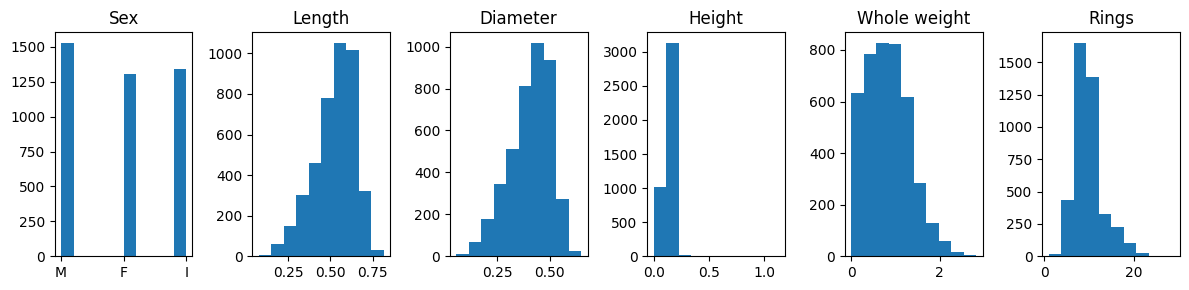

In [44]:
# Create a figure with 1 row, and 6 columns
figure, axes = plt.subplots(1, 6, figsize=(12, 3))  

# Select physical features of the abalone (Sex, Length, Diameter, Height, Whole weight, Rings)
abalone_phys_attr = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Rings"]

# Plot histogram for each feature
# Include a title on each subplot
### YOUR CODE STARTS HERE ###
for i, feature in enumerate(abalone_phys_attr):
    axes[i].set_title(feature)
    axes[i].hist(abalone_clean[feature])
### YOUR CODE ENDS HERE ###

plt.tight_layout()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 1.4.b (2 Points): Plotting Distributions per Category with matplotlib
Now, you will visualize the distribution of "Whole weight" and "Length" with Violin plots.  Use `matplotlib.pyplot` to do this, which is already imported for you as `plt`. Do not use any other plotting libraries, such as `seaborn`.

- For every class in `abalone_clean["Sex"]`, plot a Violin plot of the values of "Whole weight" and "Length". Your plot should consist of a grid of subplots with 1 row and 2 columns.
- Include a title above each subplot to indicate which feature we are plotting. 

Some starter code is provided for you below. (Hint: `axes[0].violinplot(...)` will create a violinplot in the first subplot.)

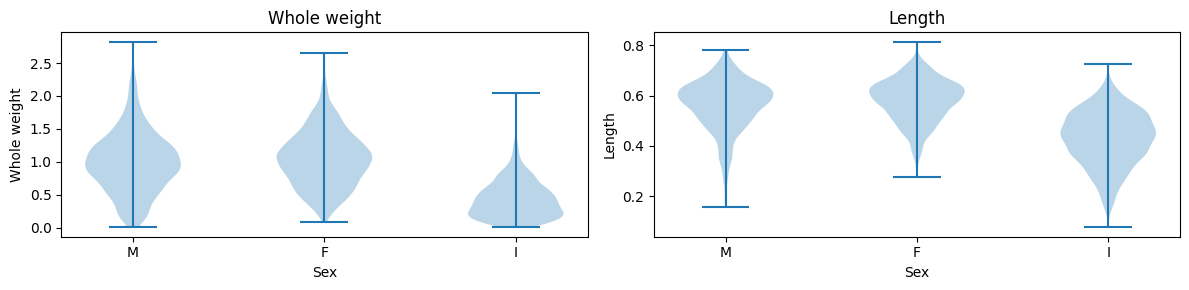

In [57]:
figure, axes = plt.subplots(1, 2, figsize=(12, 3))

### YOUR CODE STARTS HERE ###
# Plot a scatter for each feature pair.
# Make sure to color the points by their class label.
# Include an x-label and a y-label for each subplot.
features = ['Whole weight', 'Length']
sex_categories = abalone_clean["Sex"].unique()

for i, feature in enumerate(features):
    data = [abalone_clean[abalone_clean["Sex"] == sex][feature].values for sex in sex_categories]
    axes[i].violinplot(data)
    axes[i].set_title(feature)
    axes[i].set_xlabel("Sex")
    axes[i].set_ylabel(feature)
    axes[i].set_xticks(range(1, len(sex_categories) + 1))
    axes[i].set_xticklabels(sex_categories)

plt.tight_layout()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 1.5 (10 points): Feature Scatter Plots
To help further visualize the abalone datset, you will now create several scatter plots of the features. Use `matplotlib.pyplot` to do this, which is already imported for you as `plt`. Do not use any other plotting libraries, such as `seaborn`.

- For every pair of features in `abalone_X`, plot a scatter plot of the feature values, colored according to their labels. For example, plot all data points with `F` to red, `M` to blue, `I` to orange.
- Include an x-label and a y-label on each subplot to indicate which features we are plotting.

Use the feature as the label for the x-axis and y-axis.

Some starter code is provided for you below.

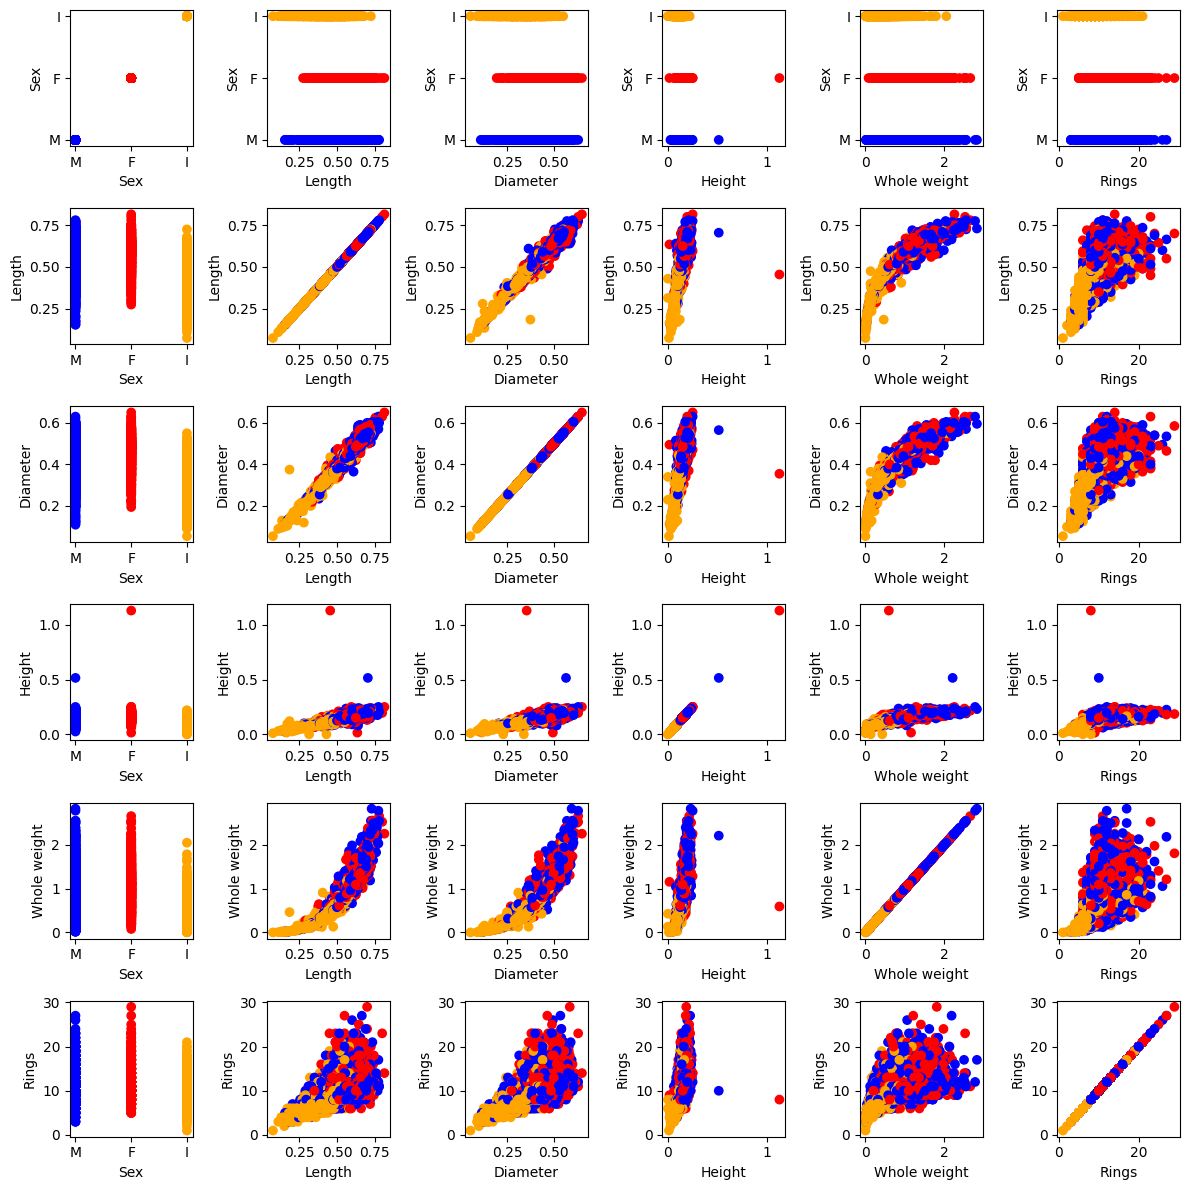

In [58]:
# create a figure  with 6 rows and 6 columns for features in abalone_clean
figure, axes = plt.subplots(6, 6, figsize=(12, 12))

# Define the features to plot
abalone_X = abalone_clean[abalone_phys_attr]

# Create a dictionary mapping sex to unique colors
sex_to_color = {'F': 'red', 'M': 'blue', 'I': 'orange'}

# Replace sex letter (M,F,I) with integers in the DataFrame
abalone_color = abalone_clean['Sex'].map(sex_to_color)

### YOUR CODE STARTS HERE ###
# Plot a scatter for each feature pair.
# Make sure to color the points by their class label.
# Include an x-label and a y-label for each subplot.
for i, feature in enumerate(abalone_phys_attr):
    for j, feature in enumerate(abalone_phys_attr):
        axes[i,j].scatter(abalone_X.iloc[:,j], abalone_X.iloc[:,i], c = abalone_color)
        axes[i,j].set_xlabel(abalone_phys_attr[j])
        axes[i,j].set_ylabel(abalone_phys_attr[i])



plt.tight_layout()

<!-- END QUESTION -->

## Problem 2: Nearest Centroid Classifiers

In this problem, you will implement a nearest centroid classifier and train it on the Unown-MNIST dataset. Unown-MNIST is divided into a training set of 25,000 unown pokemon. Each sample is a grayscale image sized 28x28 pixels, paired with one of 10 class labels. Run the following block of code to load the Unown-MNIST dataset:

In [59]:
# Load the features and labels for the MNIST dataset
unown_X, unown_y = np.load("data/unown_X.npy"), np.load("data/unown_y.npy")

In the following block, we split the Unown-MNIST dataset into training and testing sets -- 75% of the data is used for training, and 25% is used for testing. The function `train_test_split` is provided by scikit-learn, and will automatically shuffle our data for us if we use the flag `shuffle=True`. 

**NOTE:** For this homework, do not alter the flag `random_state=hw1_seed`, as this is necessary for obtaining reproducible results.

In [60]:
unown_X_tr, unown_X_te, unown_y_tr, unown_y_te = train_test_split(unown_X, unown_y, 
                                                                  test_size=0.25, random_state=hw1_seed, shuffle=True)
unown_X_tr
unown_X_te
unown_y_tr
unown_y_te

array([1, 4, 4, ..., 9, 6, 2], shape=(6250,), dtype=uint8)

<!-- BEGIN QUESTION -->

### Problem 2.1 (5 points): Unown-MNIST Visualization
Let's begin by visualizing a few of the images in the Unown-MNIST dataset. Use `matplotlib.pyplot` to do this, which is already imported for you as `plt`. Do not use any other plotting libraries, such as `seaborn`.

- Plot the first 16 images in `unown_X_tr` in a 4x4 grid. ([Hint 1](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) [Hint 2](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html))
- Include a title for each subplot indicating the label of the image.

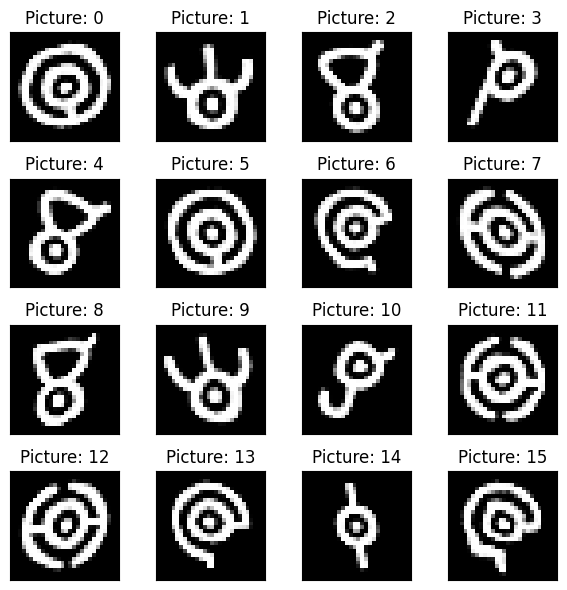

In [85]:
# Some default settings for our plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Create a figure with 4 rows and 4 columns
figure, axes = plt.subplots(4, 4, figsize=(6, 6))  

### YOUR CODE STARTS HERE ###
# Plot the first 16 images in our dataset.
# Include a title on each subplot to indicate the corresponding label.
# (≈ 5 lines of code)
for i, ax in enumerate(axes.flat[:16]):
    ax.imshow(unown_X_tr[i].reshape(28, 28)) 
    ax.set_title(f'Picture: {i}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



### YOUR CODE ENDS HERE  ###

plt.tight_layout()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 2.2 (20 points): Implementing a Nearest Centroid Classifier

In the code given below, we define the class `NearestCentroidClassifier` which has an unfinished implementation of a nearest centroid classifier. For this problem, you will complete this implementation. Your nearest centroid classifier will use the Euclidean distance, which is defined for two feature vectors $\mathbf{x}_1$ and $\mathbf{x}_2$ as

$$d_E(\mathbf{x}_1, \mathbf{x}_2) = \sqrt{\sum_{j=1}^d (x_{1j} - x_{2j})^2}. $$


- Implement the method `fit`, which takes in an array of features `X` and an array of labels `y` and trains our classifier.  You should store your computed centroids in the list `self.centroids`.
- Test your implementation of `fit` by training a `NearestCentroidClassifier` on the Unown-MNIST training set, and using the provided method `plot_centroids` to visualize the centroids. If your implementation is correct, the centroids should resemble the corresponding class label in the plot.
- Implement the method `predict`, which takes in an (array of) feature vectors `X` and predicts their class labels.
- Print the predicted labels (using your `predict` function) and the true labels for the first ten images in the Unown-MNIST testing set. Make sure to indicate which are the predicted labels and which are the true labels.

You are allowed to modify the given code as necessary to complete the problem, e.g. you may create helper functions. Leave the type hints and function signatures as is.

In [35]:
class NearestCentroidClassifier:
    def __init__(self):
        # A list containing the centroids; to be filled in with the fit method.
        self.centroids = []  
        
    def plot_centroids(self):
        # Some default settings for our plots
        plt.rcParams['image.interpolation'] = 'nearest'
        plt.rcParams['image.cmap'] = 'gray'

        # Create a figure with 2 rows and 5 columns
        figure, axes = plt.subplots(2, 5, figsize=(12, 4))  
        
        # Plot the centroids
        for i in range(10):
            axes[i//5, i%5].imshow(self.centroids[i].reshape(28, 28))
            axes[i//5, i%5].set_title(f'Label: {i}')
        
        plt.tight_layout()
        plt.show()
        
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """ 
        Fits the nearest centroid classifier with training features X and training labels y.
        
        Parameters:
        X (np.ndarray): array of training features; shape (n, d), where n is the number of datapoints, and d is the number of features.
        y (np.ndarray): array training labels; shape (n, ), where n is the number of datapoints.

        Returns:
        None
        """
        ### YOUR CODE STARTS HERE ###
        # Hint: you should append to self.centroids with the corresponding centroids.
        
        ...

        ### YOUR CODE ENDS HERE
                    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """ 
        Makes predictions with the nearest centroid classifier on the features in X.

        Parameters:
        X (np.ndarray): array of features; shape (n, d), where n is the number of datapoints, and d is the number of features.

        Returns:
        y_pred (np.ndarray): a numpy array of predicted labels; shape (n, ), where n is the number of datapoints.
        """
        ### YOUR CODE STARTS HERE ###

        ...
        ### YOUR CODE ENDS HERE ###    
        return y_pred

<!-- END QUESTION -->

Here is some code illustrating how to use your `NearestCentroidClassifier`. You can run this code to fit your classifier and to plot the centroids. You should write your implementation above such that you don't need to modify the code in the next cell.

In [36]:
nc_classifier = NearestCentroidClassifier()
nc_classifier.fit(unown_X_tr, unown_y_tr)

IndexError: list index out of range

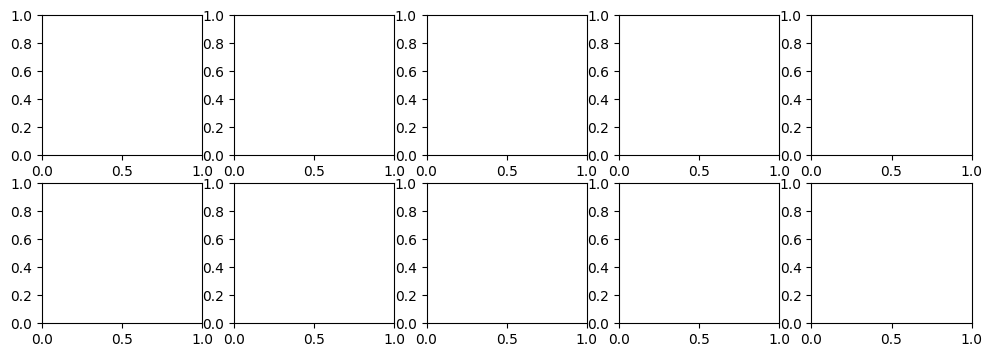

In [37]:
nc_classifier.plot_centroids()

In [ ]:
# Print the predicted and true labels for the first ten images in the Unown-MNIST testing set
y_hat_te = nc_classifier.predict(unown_X_te[:10, :])
print("Predicted labels:", y_hat_te)

In [ ]:
print("True labels:", unown_y_te[:10])

## Problem 2.3 (10 points): Evaluating Nearest Centroids Classifier

Now that you've implemented the nearest centroid classifier, it is time to evaluate its performance.

- Write a function `compute_accuracy` that computes the accuracy of a model's predictions. That is, your function should take in an array of true labels y and an array of predicted labels `y_pred`, and return the accuracy of the predictions. You may use numpy to do this, but do not use `sklearn` or any other machine learning libraries.
- Write a function that computes the confusion matrix of a model's predictions. That is, your function should  take in an array of true labels `y`and an array of predicted labels `y_pred`, and return corresponding $C \times C$ confusion matrix as a numpy array, where $C$ is the number of classes. You may use numpy to do this, but do not use `sklearn` or any other machine learning libraries.
- Verify that your implementations of `NearestCentroidClassifier`, `compute_accuracy`, and `compute_confusion_matrix` are correct. To help you do this, you are given the functions `eval_sklearn_implementation` and `eval_my_implementation`. The function `eval_sklearn_implementation` will use the relevant `sklearn` implementations to compute the accuracy and confusion matrix of a nearest centroid classifier. The function `eval_my_implementation` will do the same, but for your implementations. If your code is correct, the outputs of the two functions should be the same.

_Type your answer here, replacing this text._

<!-- BEGIN QUESTION -->



In [ ]:
def compute_accuracy(y, y_pred):
    ### YOUR CODE STARTS HERE ###
    
    accuracy = ...
    
    ### YOUR CODE ENDS HERE ###
    
    return accuracy

In [ ]:
def compute_confusion_matrix(y, y_pred):
    
    ### YOUR CODE STARTS HERE ###
    ...
    ### YOUR CODE ENDS HERE ###
    return conf_matrix

In [ ]:
###############################################
### Results with the sklearn implementation ###
###############################################

def eval_sklearn_implementation(X_tr, y_tr, X_te, y_te):
    # Nearest centroid classifier implemented in sklearn
    sklearn_nearest_centroid = NearestCentroid()

    # Fit on training dataset
    sklearn_nearest_centroid.fit(X_tr, y_tr)

    # Make predictions on training and testing data
    sklearn_y_pred_tr = sklearn_nearest_centroid.predict(X_tr)
    sklearn_y_pred_te = sklearn_nearest_centroid.predict(X_te)

    # Evaluate accuracies using the sklearn function accuracy_score
    sklearn_acc_tr = accuracy_score(y_tr, sklearn_y_pred_tr)
    sklearn_acc_te = accuracy_score(y_te, sklearn_y_pred_te)

    print(f'Sklearn Results:')
    print(f'--- Accuracy (train): {sklearn_acc_tr}')
    print(f'--- Accuracy (test): {sklearn_acc_te}')

    # Evaluate confusion matrix using the sklearn function confusion_matrix
    sklearn_cm = confusion_matrix(y_te, sklearn_y_pred_te)
    sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
    sklearn_disp.plot()
    
# Call the function    
unown_X_tr_flattened = unown_X_tr.reshape((18750, 784))
unown_X_te_flattened = unown_X_te.reshape((6250, 784))

non_zero_var = []

for i in range(784):
    unique = np.unique(unown_X_tr_flattened[:, i])
    if len(unique) != 1:
        non_zero_var.append(i)

print(len(non_zero_var))

eval_sklearn_implementation(unown_X_tr_flattened[:, non_zero_var], unown_y_tr, unown_X_te_flattened[:, non_zero_var], unown_y_te)

In [ ]:
#########################################
### Results with your implementation ###
#########################################

def eval_my_implementation(X_tr, y_tr, X_te, y_te):
    # Now test your implementation of NearestCentroidClassifier
    nearest_centroid = NearestCentroidClassifier()

    # Fit on training dataset
    nearest_centroid.fit(X_tr, y_tr)

    # Make predictions on training and testing data
    y_pred_tr = nearest_centroid.predict(X_tr)
    y_pred_te = nearest_centroid.predict(X_te)

    # Evaluate accuracies using your function compute_accuracy
    acc_tr = compute_accuracy(y_tr, y_pred_tr)
    acc_te = compute_accuracy(y_te, y_pred_te)

    print(f'Your Results:')
    print(f'--- Accuracy (train): {acc_tr}')
    print(f'--- Accuracy (test): {acc_te}')

    # Evaluate confusion matrix using your function compute_confusion_matrix
    cm = compute_confusion_matrix(y_te, y_pred_te)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)
    disp.plot(); 

# Call the function
eval_my_implementation(unown_X_tr, unown_y_tr, unown_X_te, unown_y_te)

<!-- END QUESTION -->

## Problem 3: kNN
For the final problem of this homework, you will explore the k-nearest-neighbors algorithm using the Abalone dataset. You will use the `sklearn` implementation of kNN for this problem.

<!-- BEGIN QUESTION -->

### Problem 3.1: Decision Boundaries


#### Problem 3.1.a (4 points): Train/Test Split
- Using the code in Problem 1 and Problem 2, to create a train/test split of the Abalone dataset containing two features `['Whole weight','Length']`. Use 75% of the data for training, and 25% of the data for testing. Set `shuffle=True` and be sure to use `random_state=hw1_seed`.
- Fit a kNN classifier on this new training set, and plot the resulting decision boundary for values of `k = [1, 5, 10, 50]`.
- Write a short description of what you see happen as you increase the value of `k`.

Here are a few tips to help you get started.
- In `sklearn`, you can create a kNN classifier with `k` neighbors via `knn = KNeighborsClassifier(n_neighbors=k)`.
- You can then use `knn.fit(...)` and `knn.predict(...)` to fit the classifier and make predictions with it.
- See [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for the corresponding documentation.

In [ ]:
# First define the abalone_y values for the abalone dataset
abalone_y = abalone_clean['Sex']

In [ ]:
# Create a 75%/25% train/test split using 'Whole weight' and 'Length' features
### YOUR CODE STARTS HERE ###
abalone_X_tr2, abalone_X_te2, abalone_y_tr2, abalone_y_te2 = ...
###  YOUR CODE ENDS HERE  ###
abalone_X_tr2
abalone_X_te2
abalone_y_tr2
abalone_y_te2

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Problem 3.1.b (10 points): KNN Decision Boundary Plot

- Fit a kNN classifier on this new training set, and plot the resulting decision boundary for values of `k = [1, 5, 10, 50]`.
- Write a short description of what you see happen as you increase the value of `k`. 
- Hint: [this](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) function might be useful for the plot. 

In [ ]:
# Plot the decision boundaries for the kNN classifiers for various values of k

# Some keyword arguments for making nice looking plots.
# Feel free to change grid_resolution to a higher number -- this results in better looking plots,
# but may result in your code running more slowly.
plot_kwargs = {'cmap': 'RdYlBu',
               'response_method': 'predict',
               'plot_method': 'pcolormesh',
               'shading': 'auto',
               'alpha': 0.5,
               'grid_resolution': 100}


# Create a figure with 2 rows and 2 columns
figure, axes = plt.subplots(2, 2, figsize=(8, 8))

abalone_color = abalone_y_tr2.map(sex_to_color)

k_vals = [1, 5, 10, 50]
for i, k in enumerate(k_vals):
    knn = ...
    ...
    
    ...
    
    axes[i//2, i%2].scatter(abalone_X_tr2['Whole weight'], abalone_X_tr2['Length'], c= ...
    ...
    axes[i//2, i%2].set_xlim((-0.5, 3))
    axes[i//2, i%2].set_ylim((0, 1))

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 3.2 (15 points): Error Rates vs k 

Now, we will vary the value of $k$ and see what effect this has on our predictions.

- Again, using only the given two features in the Abalone dataset, compute the error rate on both the training and testing data as a function of `k`. Do this for all values of `k = [1, 2, 5, 10, 50, 100, 110]`. You may use your own implementation of the accuracy from Problem 2.3, or the scikit-learn function `sklearn.metrics.accuracy_score`.
- Plot the resulting error rate functions using a semi-log plot (i.e. the x-axis is on a logarithmic scale), with the training error in red and the validation error in green. This can be done using `axes[0].semlilogx(...)`. Use `matplotlib.pyplot` to do this, which is already imported for you as `plt`. Do not use any other plotting libraries, such as `pandas` or `seaborn`.
- What value of `k` would you recommend, and why?

In [ ]:
# Create a figure with only one subplot
figure, axes = plt.subplots(1, figsize=(6, 6))

### YOUR CODE STARTS HERE ###
...
###  YOUR CODE ENDS HERE  ###

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

---
### Statement of Collaboration (4 points)
It is **mandatory** to include a Statement of Collaboration in each submission, with respect to the guidelines below. Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.

All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments, in particular, I encourage the students to organize (perhaps using EdD) to
discuss the task descriptions, requirements, bugs in my code, and the relevant technical content before they start
working on it. However, you should not discuss the specific solutions, and, as a guiding principle, you are not
allowed to take anything written or drawn away from these discussions (i.e. no photographs of the blackboard,
written notes, referring to EdD, etc.). Especially after you have started working on the assignment, try
to restrict the discussion to EdD as much as possible, so that there is no doubt as to the extent of your
collaboration. 

<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Please submit your hw1.ipynb by the deadline.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)